## Classical ML regression

We will build a decision tree to fit to the data that we cleaned in the first exercise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load up the data

We use pandas to read in the data. In this case the first 6 columns (0-5) are the features and the final column (6) are the labels. The code to do this is:
```
df = pd.read_pickle('./week1-cleaned-data.pickle')
```
We then explore the data and look for highly correlated columns and drop these from the dataset.

```
import seaborn as sns
corrmat = df.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")
plt.show()
```

```
df_train = df.drop([<list>], axis=1)
```

We then standardise the data using the `StandardScaler`. **Note** if the data has only one feature, like the label data y, we need to use a reshape when standardising. The code to do this is:
```

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))
```

We then use the `train_test_split` function to make separate training and test sets; use 80% to train and 20% to test. You should be able to do this without a code hint

In [4]:
df = pd.read_pickle('./week1-cleaned-data.pickle')

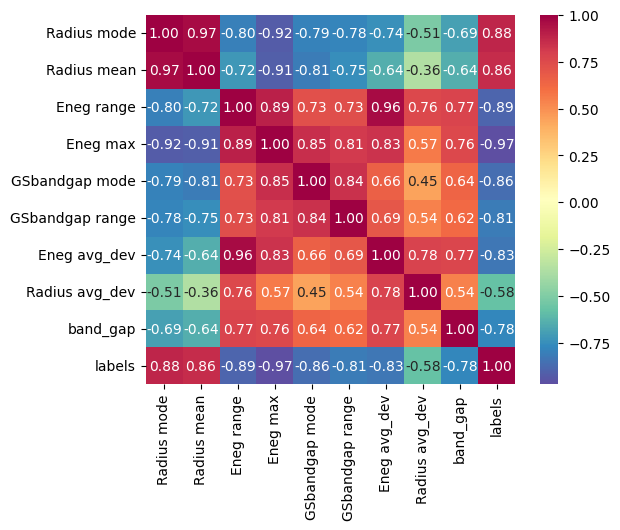

In [5]:
import seaborn as sns
corrmat = df.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")
plt.show()

In [6]:
df_train = df.drop(['Eneg range', 'Radius mean'], axis=1)

In [7]:
x = df_train.values[:, :6]
y = df_train.values[:, 6]

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,
                                  train_size=0.8)

## Train a model

We will train a gradient boosted regressor, using the default hyperparameters. The code to do this is:
```
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor()
regr.fit(x_train, y_train)
```

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor()
regr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

## Visually inspect the performance of the model

Get the predictions of the model on the test set. Use `predictions = regr.predict(x_test)` to make predictions.

Use a scatter plot from matplotlib to plot `predictions` versus `y_test`. Don't forget to label your axes.

Text(0, 0.5, 'Predictions')

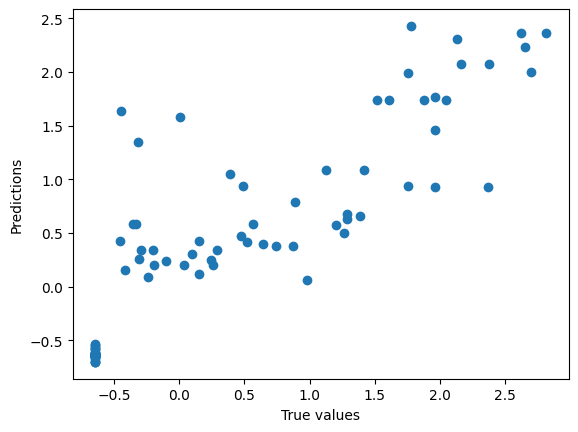

In [9]:
predictions = regr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

## Calculate the metrics for the model performace

Use the same kind of performace metrics that you used in the exercise for linear regression to compare the `predictions` to `y_test`

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(predictions, y_test))
print('r-squared:', r2_score(y_test, predictions))

Mean squared error: 0.16138940664634055
r-squared: 0.826606569686115


## Perform hyper-parameter tuning

Here we will use `GridSearchCV` from `sklearn.model_selection` to search for the best combination of hyperparameters.
Specifically we will tune the `n_estimators`, `max_leaf_nodes` and `learning_rate` together.

To get the names of the hyperparameters use `regr.get_params().keys()`

Set up the distributions to optmise over:
```
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 500, 1000],
    "learning_rate": [0.098, 0.099, 0.1 , 0.101, 0.102]
}
```
Set up the cross-validation based search:
```
search_cv = GridSearchCV(
    regr, param_grid=param_grid,
    scoring="neg_mean_absolute_error",  n_jobs=2, cv=10
)
```
Perform the search
```
search_cv.fit(x_train, y_train.ravel())
```
This will take a few minutes to complete

In [ ]:
regr.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 500, 1000],
}

search_cv = GridSearchCV(
    GradientBoostingRegressor(learning_rate=0.1), param_grid=param_grid,
    scoring="neg_mean_absolute_error",  n_jobs=2, cv=10
)

search_cv.fit(x_train, y_train.ravel())

print(search_cv.best_params_)

{'n_estimators': 200}


In [ ]:
param_grid = {
    "max_depth":range(1, 10, 2),
    "min_samples_split":range(2, 50, 10)
}

search_cv = GridSearchCV(
    GradientBoostingRegressor(learning_rate=0.1, n_estimators=200), param_grid=param_grid,
    scoring="neg_mean_absolute_error",  n_jobs=2, cv=5, verbose=2
)

search_cv.fit(x_train, y_train.ravel())

print(search_cv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'max_depth': 7, 'min_samples_split': 2}


In [ ]:
param_grid = {
    "learning_rate":[0.01, 0.05, 0.1, 0.2]
}

search_cv = GridSearchCV(
    GradientBoostingRegressor(n_estimators=200, max_depth=7, min_samples_split=2), param_grid=param_grid,
    scoring="neg_mean_absolute_error",  n_jobs=2, cv=5, verbose=2
)

search_cv.fit(x_train, y_train.ravel())

print(search_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'learning_rate': 0.1}


## Check to see what the optimal set of parameters are

You can get this by printing `search_cv.best_params_`

In [ ]:
search_cv.best_params_

{'learning_rate': 0.1}

## Look at the performace of the best model

You can select the best model using:
```
best_regr = search_cv.best_estimator_
```
Now use this `best_regr` similar to how you used `regr` above to visually look at the results and to visually inspect the performace and calculate metrics.

How does the tuned model compare to the default model?

How do these models compare to the linear regression from last week?

Text(0, 0.5, 'Predictions')

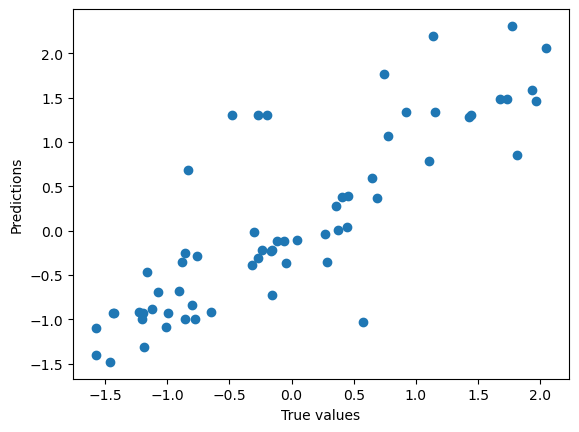

In [ ]:
best_regr = search_cv.best_estimator_

predictions = best_regr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [ ]:
print('Mean squared error:', mean_squared_error(predictions, y_test))
print('r-squared:', r2_score(y_test, predictions))

Mean squared error: 0.3435424848786466
Root mean squared error: 0.5861249737715043
r-squared: 0.6756760168473399
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=22; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=22; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=32; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=32; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=32; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=32; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=42; total time=   0